### Context ###

The data consists of measurements made on patients with malignant melanoma. Each patient
had their tumour removed by surgery at the Department of Plastic Surgery, University Hospital
of Odense, Denmark during the period 1962 to 1977. The surgery consisted of complete
removal of the tumour together with about 2.5cm of the surrounding skin.
Among the measurements taken were the thickness of the tumour and whether it was
ulcerated or not. These are thought to be important prognostic variables in that patients with a
thick and/or ulcerated tumour have an increased chance of death from melanoma. Patients
were followed until the end of 1977. The data frame contains the following columns.

• time - Survival time in days since the operation.

• status - The patients status at the end of the study

1 indicates that they had died from melanoma, 2 indicates that they were still alive and 3
indicates that they had died from causes unrelated to their melanoma.

• sex - The patients sex; 1=male, 0=female.

• age - Age in years at the time of the operation.

• year - Year of operation.

• thickness - Tumour thickness in mm.

• ulcer - Indicator of ulceration; 1=present, 0=absent

## Task
As a data scientist, you are tasked to ask salient questions,analyse the data and report your findings. 

What percentage of the patients had thick tumor? (≥4 mm in thickness is considered thick, >= 8 mm is ultrathick)
What percentage of the patients had an ulcerated tumor?
What percentage of the patients had an ulcerated tumor and thick tumor?
What percentage of those who died from melanoma had thick tumor?
What percentage of those who died from melanoma had an ulcerated tumor?
What percentage of those who died from melanoma had thick tumor and an ulcerated tumor?
What was the death rate?
Average survival time after surgery.
Average death rate for males and females.
How many people died as a result of Melanoma?
How many people died as a result of other causes.
How many people died as a result of Melanoma.
Average thickness of the tumor.
How many people survived during the research exercise.

### Importing libraries and loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
melanoma = pd.read_csv("melanoma.csv")

### Sanity Checks

In [3]:
melanoma.head()

,time,status,sex,age,year,thickness,ulcer
0,10,3,1,76,1972,6.76,1
1,30,3,1,56,1968,0.65,0
2,35,2,1,41,1977,1.34,0
3,99,3,0,71,1968,2.90,0
4,185,1,1,52,1965,12.08,1


In [4]:

melanoma.tail()

,time,status,sex,age,year,thickness,ulcer
200,4492,2,1,29,1965,7.06,1
201,4668,2,0,40,1965,6.12,0
202,4688,2,0,42,1965,0.48,0
203,4926,2,0,50,1964,2.26,0
204,5565,2,0,41,1962,2.90,0


In [5]:
melanoma.shape

(205, 7)

In [6]:
melanoma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       205 non-null    int64  
 1   status     205 non-null    int64  
 2   sex        205 non-null    int64  
 3   age        205 non-null    int64  
 4   year       205 non-null    int64  
 5   thickness  205 non-null    float64
 6   ulcer      205 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 11.3 KB


In [7]:
# Checking for null values
melanoma.isnull().sum().sum()

0

In [8]:
melanoma.rename(columns = {"time" : "time(days)", 
                          "thickness" : "thickness(mm)"},
                           inplace = True)

In [9]:
melanoma.head(2)

,time(days),status,sex,age,year,thickness(mm),ulcer
0,10,3,1,76,1972,6.76,1
1,30,3,1,56,1968,0.65,0


In [10]:
melanoma['sex'] = melanoma['sex'].replace({1: 'Male', 0: 'Female'})

In [11]:
melanoma['status'] = melanoma['status'].replace({1: 'Melanoma Death', 2: 'Alive', 3: 'Unrelated Death'})

In [12]:
melanoma['ulcer'] = melanoma['ulcer'].replace({0: 'Absent', 1: 'Present'})

In [13]:
melanoma.head()

,time(days),status,sex,age,year,thickness(mm),ulcer
0,10,Unrelated Death,Male,76,1972,6.76,Present
1,30,Unrelated Death,Male,56,1968,0.65,Absent
2,35,Alive,Male,41,1977,1.34,Absent
3,99,Unrelated Death,Female,71,1968,2.90,Absent
4,185,Melanoma Death,Male,52,1965,12.08,Present


In [14]:
melanoma.describe(include = np.number)

,time(days),age,year,thickness(mm)
count,205.000000,205.000000,205.000000,205.000000
mean,2152.800000,52.463415,1969.907317,2.919854
std,1122.060667,16.671711,2.575563,2.959433
min,10.000000,4.000000,1962.000000,0.100000
25%,1525.000000,42.000000,1968.000000,0.970000
50%,2005.000000,54.000000,1970.000000,1.940000
75%,3042.000000,65.000000,1972.000000,3.560000
max,5565.000000,95.000000,1977.000000,17.420000


In [15]:
melanoma.describe(include = 'object')

,status,sex,ulcer
count,205,205,205
unique,3,2,2
top,Alive,Female,Absent
freq,134,126,115


### Exploratory Data Analysis

#### Univariate Analysis

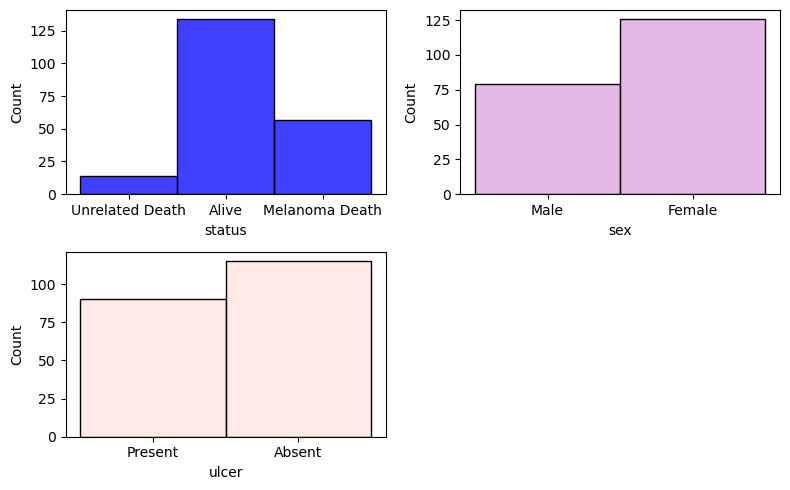

In [16]:
# Categorical Variables

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))

sns.histplot(data=melanoma, x="status", ax=axes[0,0], color= 'blue')
sns.histplot(data=melanoma, x="sex", ax=axes[0,1], color='plum')
sns.histplot(data=melanoma, x="ulcer", ax=axes[1,0], color="mistyrose")

# Remove the last plot
fig.delaxes(axes[1,1])

plt.tight_layout()

plt.show()


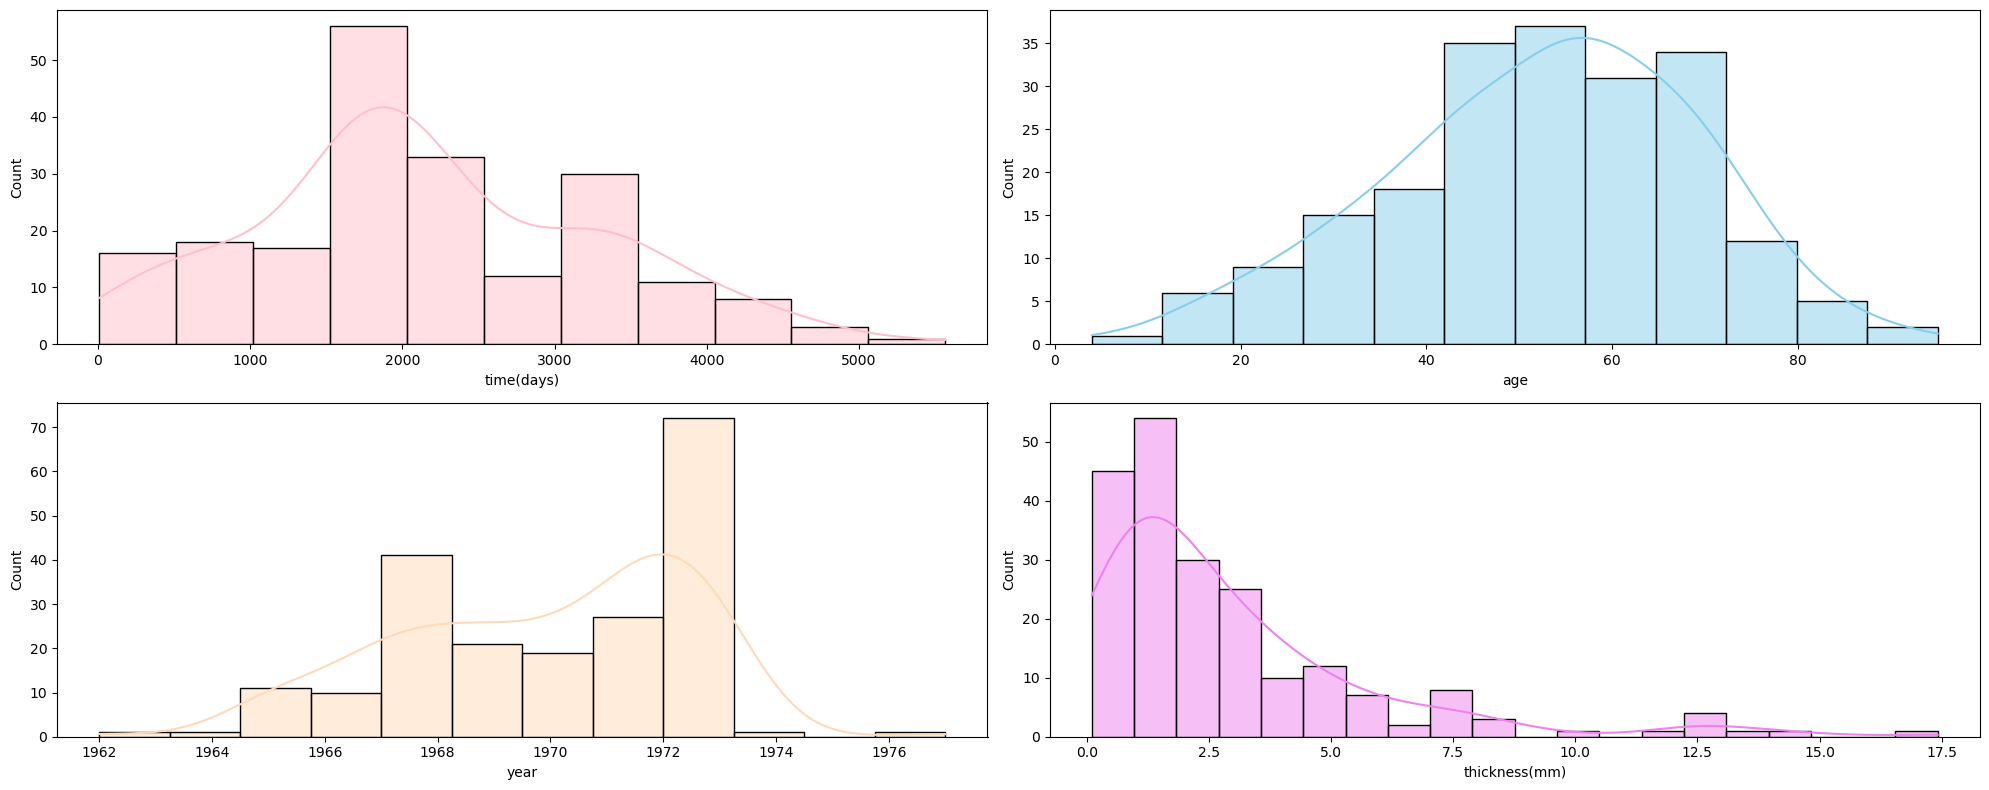

In [17]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))

# Plot histograms
sns.histplot(data=melanoma, x="time(days)", ax=axes[0,0], kde = True, color="pink")
sns.histplot(data=melanoma, x="age", ax=axes[0,1], kde = True, color="skyblue")
sns.histplot(data=melanoma, x="year", ax=axes[1,0], kde = True, color="peachpuff") 
sns.histplot(data=melanoma, x="thickness(mm)", ax=axes[1,1], kde = True, color="violet")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

##### What percentage of the patients had thick tumor? (≥4 mm in thickness is considered thick, >= 8 mm is ultrathick)

In [18]:
#  percentage of the patients who had thick tumor

thick_tumor = melanoma[melanoma["thickness(mm)"] >= 4]
thick_tumor

thick_tumor_percentage = (len(thick_tumor)/len(melanoma)) * 100
print("{}%".format(thick_tumor_percentage))

21.951219512195124%


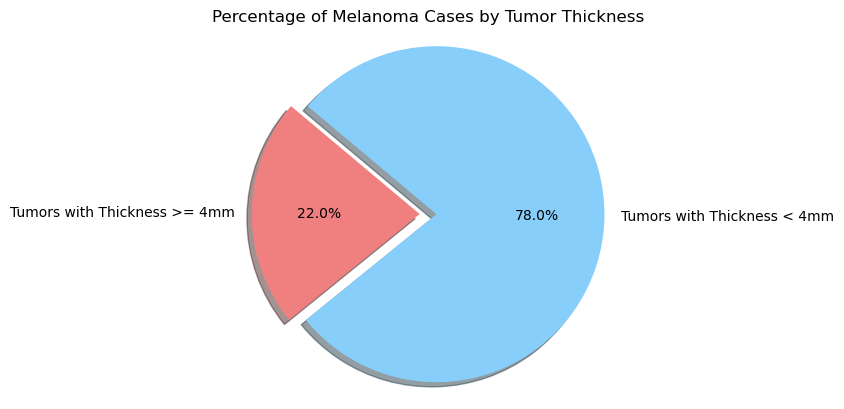

In [19]:
# pie chart of Percentage of Melanoma Cases by Tumor Thickness

labels = ['Tumors with Thickness >= 4mm', 'Tumors with Thickness < 4mm']
sizes = [thick_tumor_percentage, 100 - thick_tumor_percentage]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of Melanoma Cases by Tumor Thickness')

plt.show()

##### What percentage of the patients had an ulcerated tumor?

In [20]:
ulcerated_tumor = melanoma[melanoma["ulcer"] == "Present"]
ulcerated_tumor 

ulcerated_tumor_percentage = (len(ulcerated_tumor)/len(melanoma)) * 100
print("{}%".format(ulcerated_tumor_percentage))

43.90243902439025%


<function matplotlib.pyplot.show(close=None, block=None)>

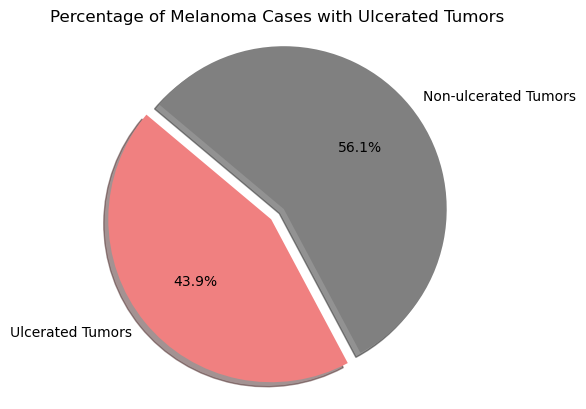

In [22]:
# pie chart of Percentage of Melanoma Cases with Ulcerated Tumors
labels = ['Ulcerated Tumors', 'Non-ulcerated Tumors']
sizes = [ulcerated_tumor_percentage, 100 - ulcerated_tumor_percentage]
colors = ['lightcoral', 'grey']
explode = (0.1, 0)  
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of Melanoma Cases with Ulcerated Tumors')

plt.show

##### What percentage of the patients had an ulcerated and thick tumor?

In [25]:
thick_ulcer = melanoma[(melanoma["ulcer"] == "Present") & (melanoma["thickness(mm)"] >= 4)]
thick_ulcer

thick_ulcer_percentage = (len(thick_ulcer)/len(melanoma)) * 100
print("{}%".format(thick_ulcer_percentage))

18.536585365853657%


##### What percentage of those who died from melanoma had a thick tumor?

In [26]:
melanoma_death = melanoma[melanoma["status"] == "Melanoma Death"]

In [28]:
thick_tumor_melanoma_death = melanoma_death[melanoma_death["thickness(mm)"] >= 4]

thick_tumor_melanoma_death_percentage = (len(thick_tumor_melanoma_death)/len(melanoma_death)) * 100
print("{}%".format(thick_tumor_melanoma_death_percentage))

38.59649122807017%


##### What percentage of those who died from melanoma had an ulcerated tumor?

In [29]:
ulcer_melanoma_death = melanoma_death[melanoma_death["ulcer"] == "Present"]

ulcer_melanoma_death_percentage = (len(ulcer_melanoma_death)/len(melanoma_death)) * 100
print("{}%".format(ulcer_melanoma_death_percentage))

71.9298245614035%


##### What percentage of those who died from melanoma and had a thick and ulcerated tumor?

In [30]:
melanoma_thick_ulcer_death = melanoma[(melanoma["status"] == "Melanoma Death") & (melanoma["ulcer"] == "Present") & (melanoma["thickness(mm)"] >= 4) ]
melanoma_thick_ulcer_death

melanoma_thick_ulcer_percentage = (len(melanoma_thick_ulcer_death)/len(melanoma_death)) * 100
print("{}%".format(melanoma_thick_ulcer_percentage))

36.84210526315789%


##### How many people died as a result of Melanoma?

In [31]:
melanoma_death = melanoma[melanoma["status"] == "Melanoma Death"]
len(melanoma_death)

57

##### How many people died as a result of unrelated causes?

In [34]:
unrelated_cause_death = melanoma[melanoma["status"] == "Unrelated Death"]
len(unrelated_cause_death)

14

##### How many people are alive?

In [35]:
living_patients = melanoma[melanoma["status"] == "Alive"]
len(living_patients)

134

#### What was the average survival time after surgery?

In [36]:
# Average survival time after surgery.
avg_survival_time = melanoma["time(days)"].mean()
avg_survival_time

2152.8

#### What was the average survival time per status?

In [37]:
avg_survival_time_per_status = melanoma.groupby("status")['time(days)'].mean().reset_index(name="avg_survival_time_per_status")
avg_survival_time_per_status

,status,avg_survival_time_per_status
0,Alive,2620.671642
1,Melanoma Death,1252.947368
2,Unrelated Death,1338.285714


#### What was the Average survival time per age?

In [38]:
# Average survival time per age
avg_survival_time_age = melanoma.groupby("age")['time(days)'].mean().reset_index(name="avg_survival_time_per_age")
avg_survival_time_age

,age,avg_survival_time_per_age
0,4,3385.0
1,12,3776.0
2,14,469.0
3,15,1710.0
4,16,858.0
...,...,...
65,83,1804.5
66,84,1970.0
67,86,826.0
68,89,667.0


##### What was the Average survival time per thickness of tumor?

In [39]:
# Average survival time per thickness of tumor
avg_survival_time_per_thickness = melanoma.groupby("thickness(mm)")['time(days)'].mean().reset_index(name="avg_survival_time_per_thickness")
avg_survival_time_per_thickness

,thickness(mm),avg_survival_time_per_thickness
0,0.10,2227.000000
1,0.16,2107.857143
2,0.24,1641.000000
3,0.32,1952.166667
4,0.48,3074.000000
...,...,...
59,12.56,493.000000
60,12.88,1095.000000
61,13.85,667.000000
62,14.66,1041.000000


##### What was the Average survival time per ulcer?

In [41]:
avg_ulcerated_survival_time = melanoma.groupby('ulcer')['time(days)'].mean().reset_index(name="avg_ulcerated_survival_time")
avg_ulcerated_survival_time

,ulcer,avg_ulcerated_survival_time
0,Absent,2414.965217
1,Present,1817.811111


##### What was the Average survival time per year?

In [42]:
# Average survival time per year
avg_survival_time_year = melanoma.groupby("year")["time(days)"].mean().reset_index(name="avg_survival_per_year")
avg_survival_time_year

,year,avg_survival_per_year
0,1962,5565.000000
1,1964,4926.000000
2,1965,2682.909091
3,1966,3041.500000
4,1967,2865.550000
5,1968,2398.142857
6,1969,2666.714286
7,1970,1857.000000
8,1971,1842.851852
9,1972,1753.341463


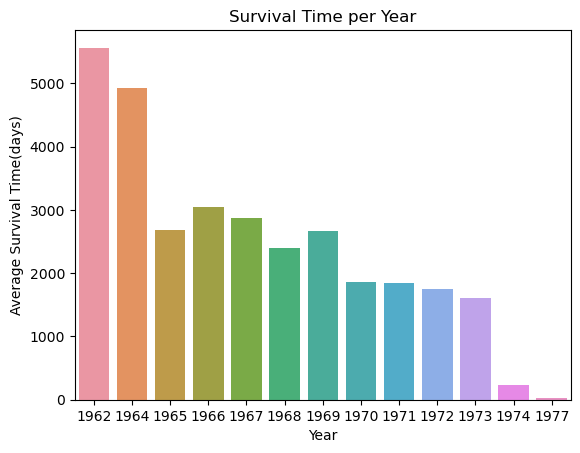

In [43]:
# barplot of Average Survival Time per Year

sns.barplot(data=avg_survival_time_year, x='year', y='avg_survival_per_year')
plt.title('Survival Time per Year')
plt.xlabel('Year')
plt.ylabel('Average Survival Time(days)')
plt.show()

###### Observation

At the beginning of the surgeries, the survival time was high on average, but as the years passed, it reduced drastically.

#### What was the Average thickness of the tumor?


In [44]:
# Average thickness of the tumor.
avg_tumor_thickness = melanoma["thickness(mm)"].mean()
avg_tumor_thickness

2.919853658536585

### Melanoma Rates for Gender

In [45]:
# Death rate for males
males = melanoma[melanoma['sex'] == 'Male']

male_deaths = males[males['status'].isin(['Melanoma Death', 'Unrelated Death'])]
male_deaths

death_rate_for_male = (len(male_deaths) / len(males)) * 100
death_rate_for_male

45.56962025316456

In [46]:
# Death rate for females
females = melanoma[melanoma['sex'] == 'Female']

female_deaths = females[females['status'].isin(['Melanoma Death', 'Unrelated Death'])]
female_deaths

death_rate_for_female = (len(female_deaths) / len(females)) * 100
death_rate_for_female

27.77777777777778

In [49]:
# Survival rate for males
living_males = males[males['status']== "Alive"]
living_males

living_rate_for_male = (len(living_males) / len(males)) * 100
living_rate_for_male

54.43037974683544

In [50]:
# Survival rate for females
living_females = females[females['status'] == "Alive"]
living_females

living_rate_for_female = (len(living_females) / len(females)) * 100
living_rate_for_female

72.22222222222221

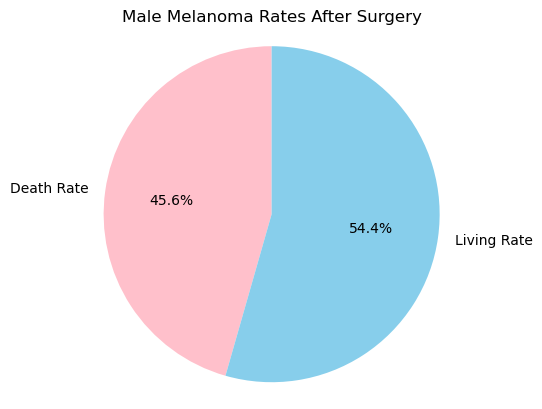

In [51]:
# Piechart of Male Melanoma Rates After Surgery
death_rate_for_male = 45.56962025316456
living_rate_for_male = 54.43037974683544

# Plotting the pie chart for male rates
labels = ['Death Rate', 'Living Rate']
sizes = [death_rate_for_male, living_rate_for_male]
colors = ['pink', 'skyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Male Melanoma Rates After Surgery')

plt.show()

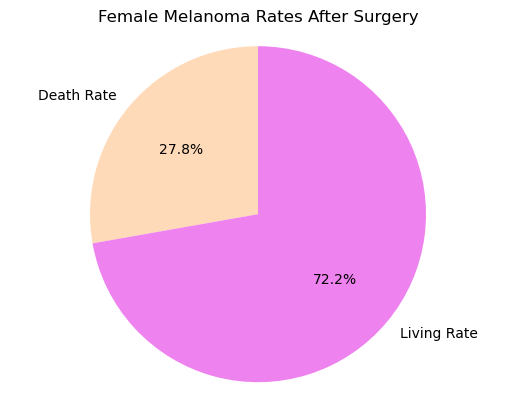

In [53]:
# Piechart of Female Melanoma Rates After Surgery
death_rate_for_female = 27.77777777777778
living_rate_for_female = 72.22222222222221

# Plotting the pie chart for female rates
labels = ['Death Rate', 'Living Rate']
sizes = [death_rate_for_female, living_rate_for_female]
colors = ['peachpuff', 'violet']


plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Female Melanoma Rates After Surgery')

plt.show()

#### Bivariate/ Multivariate Analysis

In [54]:
melanoma.dtypes

time(days)         int64
status            object
sex               object
age                int64
year               int64
thickness(mm)    float64
ulcer             object
dtype: object

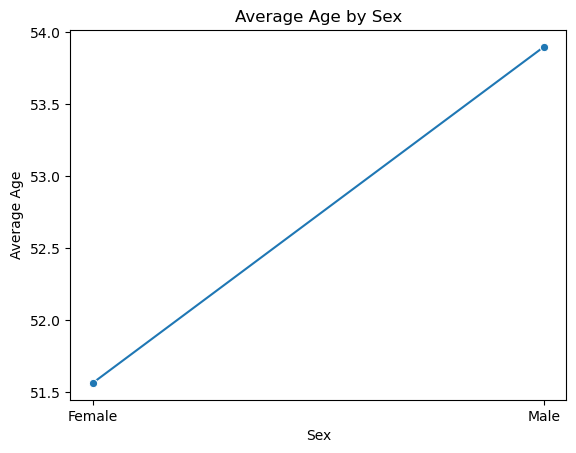

In [55]:
# lineplot of Average Age by Sex
avg_age_by_sex = melanoma.groupby('sex')['age'].mean().reset_index()

# Plotting
sns.lineplot(data=avg_age_by_sex, x='sex', y='age', marker='o')
plt.title('Average Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Age')
plt.show()

#### Observation
Majority of the patients were males and they had an average age of 53.9 years

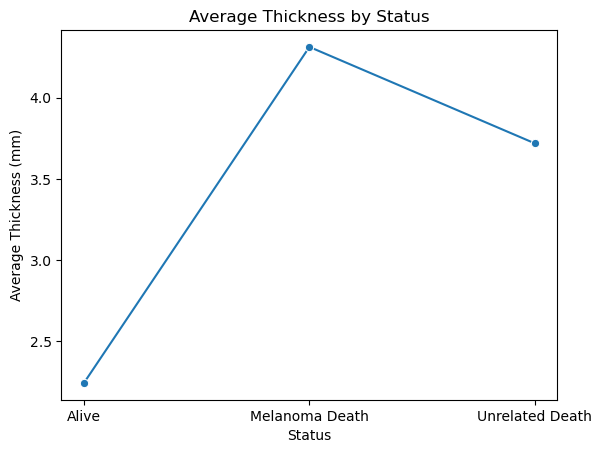

In [56]:
# lineplot of Average Thickness by Status
avg_thickness_by_status = melanoma.groupby('status')['thickness(mm)'].mean().reset_index()

sns.lineplot(data=avg_thickness_by_status, x='status', y='thickness(mm)', marker='o')
plt.title('Average Thickness by Status')
plt.xlabel('Status')
plt.ylabel('Average Thickness (mm)')
plt.show()


##### Alternatively

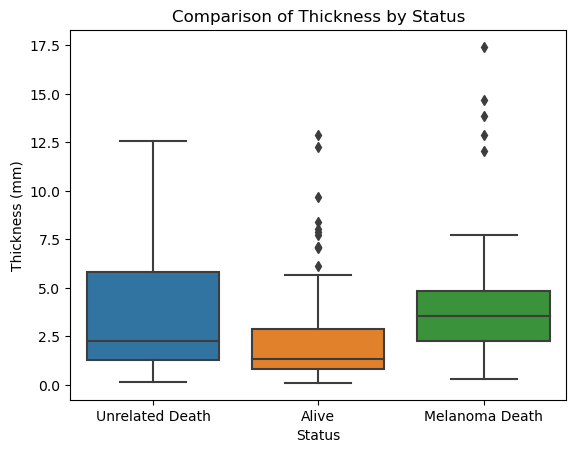

In [57]:
sns.boxplot(data=melanoma, x='status', y='thickness(mm)')
plt.title('Comparison of Thickness by Status')
plt.xlabel('Status')
plt.ylabel('Thickness (mm)')
plt.show()

##### Observation
Patients who are alive had thinner tumors than those who died

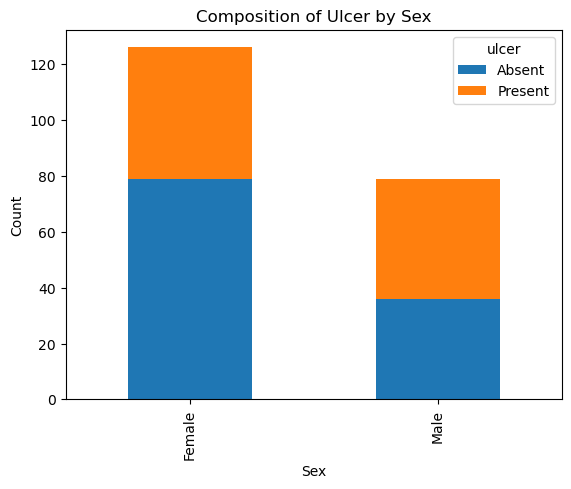

In [58]:
# crosstab of Composition of Ulcer by Sex
pd.crosstab(melanoma['sex'], melanoma['ulcer']).plot(kind='bar', stacked=True)
plt.title('Composition of Ulcer by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

#### Observation
Over 120 of the patients who had ulcerated tumors were female

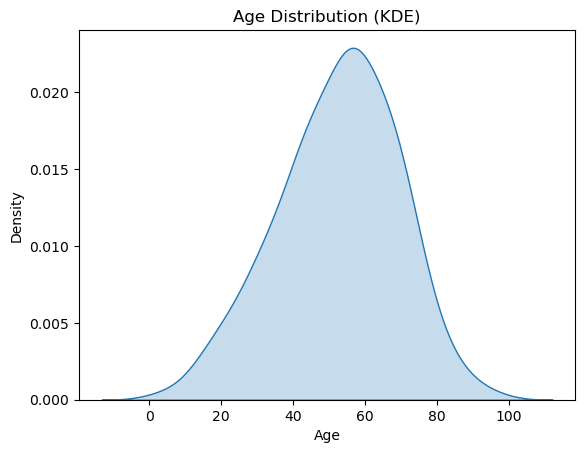

In [60]:
# density plot of Age Distribution (KDE)
sns.kdeplot(data=melanoma['age'], shade=True)
plt.title('Age Distribution (KDE)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

#### Observation
The peak age distribution of the patients is between 50 to 60 years

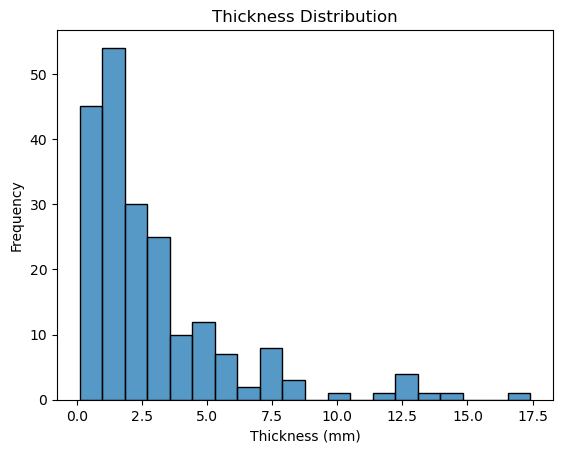

In [66]:
# histogram of Thickness Distribution
sns.histplot(data=melanoma, x='thickness(mm)', bins=20)
plt.title('Thickness Distribution')
plt.xlabel('Thickness (mm)')
plt.ylabel('Frequency')
plt.show()

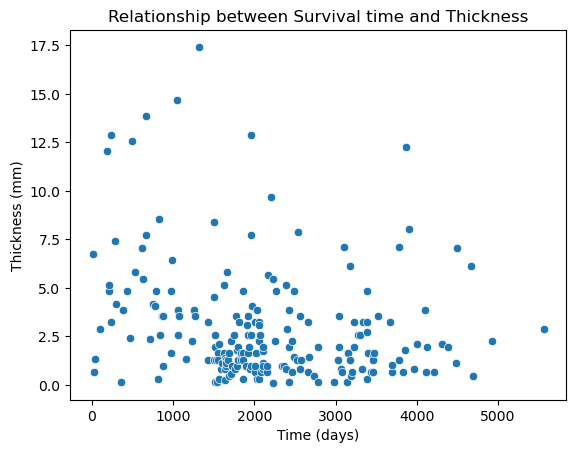

In [67]:
# scatterplot of Relationship between Survival time and Thickness
sns.scatterplot(data=melanoma, x='time(days)', y='thickness(mm)')
plt.title('Relationship between Survival time and Thickness')
plt.xlabel('Time (days)')
plt.ylabel('Thickness (mm)')
plt.show()

#### Observation
The tumor thickness of majority of the patients with a survival time of 1500 to 2000 days is less than 2.5mm

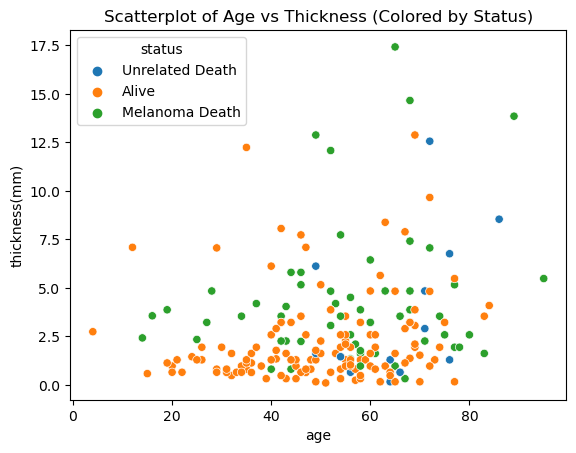

In [68]:
# Multivariate plot (scatterplot) to show the distribution of the status between the tumor thickness and patients' ages
sns.scatterplot(data=melanoma, x='age', y='thickness(mm)', hue='status')
plt.title('Scatterplot of Age vs Thickness (Colored by Status)')
plt.show()

#### Observation
The thickness of the tumor of most of patients who are/were alive at the time of the study is below 2.5mm

In [73]:
# composition of patient count per year
status_per_year = melanoma.groupby("status")["year"].value_counts().reset_index(name="patient_count")
status_per_year

,status,year,patient_count
0,Alive,1972,32
1,Alive,1973,28
2,Alive,1971,16
3,Alive,1969,14
4,Alive,1968,13
5,Alive,1967,11
6,Alive,1970,7
7,Alive,1966,5
8,Alive,1965,5
9,Alive,1962,1


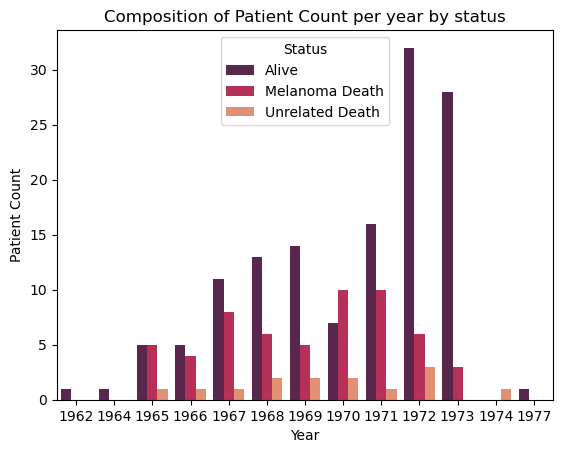

In [74]:
# barplot of Composition of Patient Count per year by status
sns.barplot(data=status_per_year, x='year', y='patient_count', hue='status', palette='rocket')
plt.title('Composition of Patient Count per year by status')
plt.xlabel('Year')
plt.ylabel('Patient Count')
plt.legend(title='Status')
plt.show()

#### Observation
1972 recorded the highest survival count since the start of the surgeries

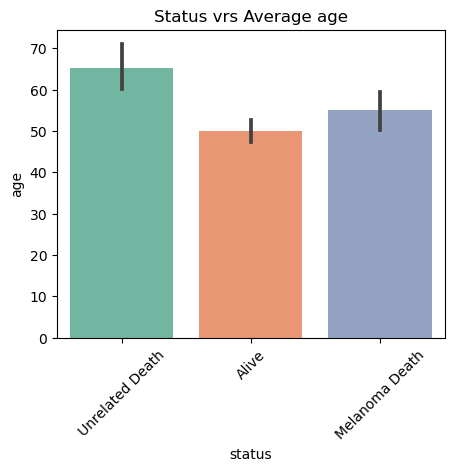

In [75]:
plt.figure(figsize=(5, 4))
sns.barplot(x='status', y='age', data=melanoma,palette='Set2')
plt.title('Status vrs Average age')
plt.xticks(rotation=45)
plt.show()

#### Observation
The average age of people who died because of Melanoma is between 50 and 55

### Conclusion

* 43.9% of the patients had non-ulcerated tumors.
* 18.53% of the patients had ulcerated and think tumor.
* 36.8% of the patients who died had a thick and ulcerated tumor.
* 57 patients died as a result of melanoma.
* 134 patients lived after the surgery.
* A total of 205 patients participated in the surgery.
* Average survival time of the surgery was 2152.8 days
* At the beginning of the surgeries, the survival time was high on average, but as the years passed, it reduced drastically.
* The females had a very high survival rate after the surgery as compared the death rate.
* The Males had a high survival rate after the surgery as compared the death rate.

### Recommendation 
* We need more information to give a good recommendation.
